In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
weather_data = pd.read_csv('CSV Files/Rainfall.csv')
weather_data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [20]:
Important_weather_features = weather_data.iloc[:,1:8]

In [21]:
Important_weather_features.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud
0,1025.9,19.9,18.3,16.8,13.1,72,49
1,1022.0,21.7,18.9,17.2,15.6,81,83
2,1019.7,20.3,19.3,18.0,18.4,95,91
3,1018.9,22.3,20.6,19.1,18.8,90,88
4,1015.9,21.3,20.7,20.2,19.9,95,81


In [22]:
Important_weather_features.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud
0,1025.9,19.9,18.3,16.8,13.1,72,49
1,1022.0,21.7,18.9,17.2,15.6,81,83
2,1019.7,20.3,19.3,18.0,18.4,95,91
3,1018.9,22.3,20.6,19.1,18.8,90,88
4,1015.9,21.3,20.7,20.2,19.9,95,81


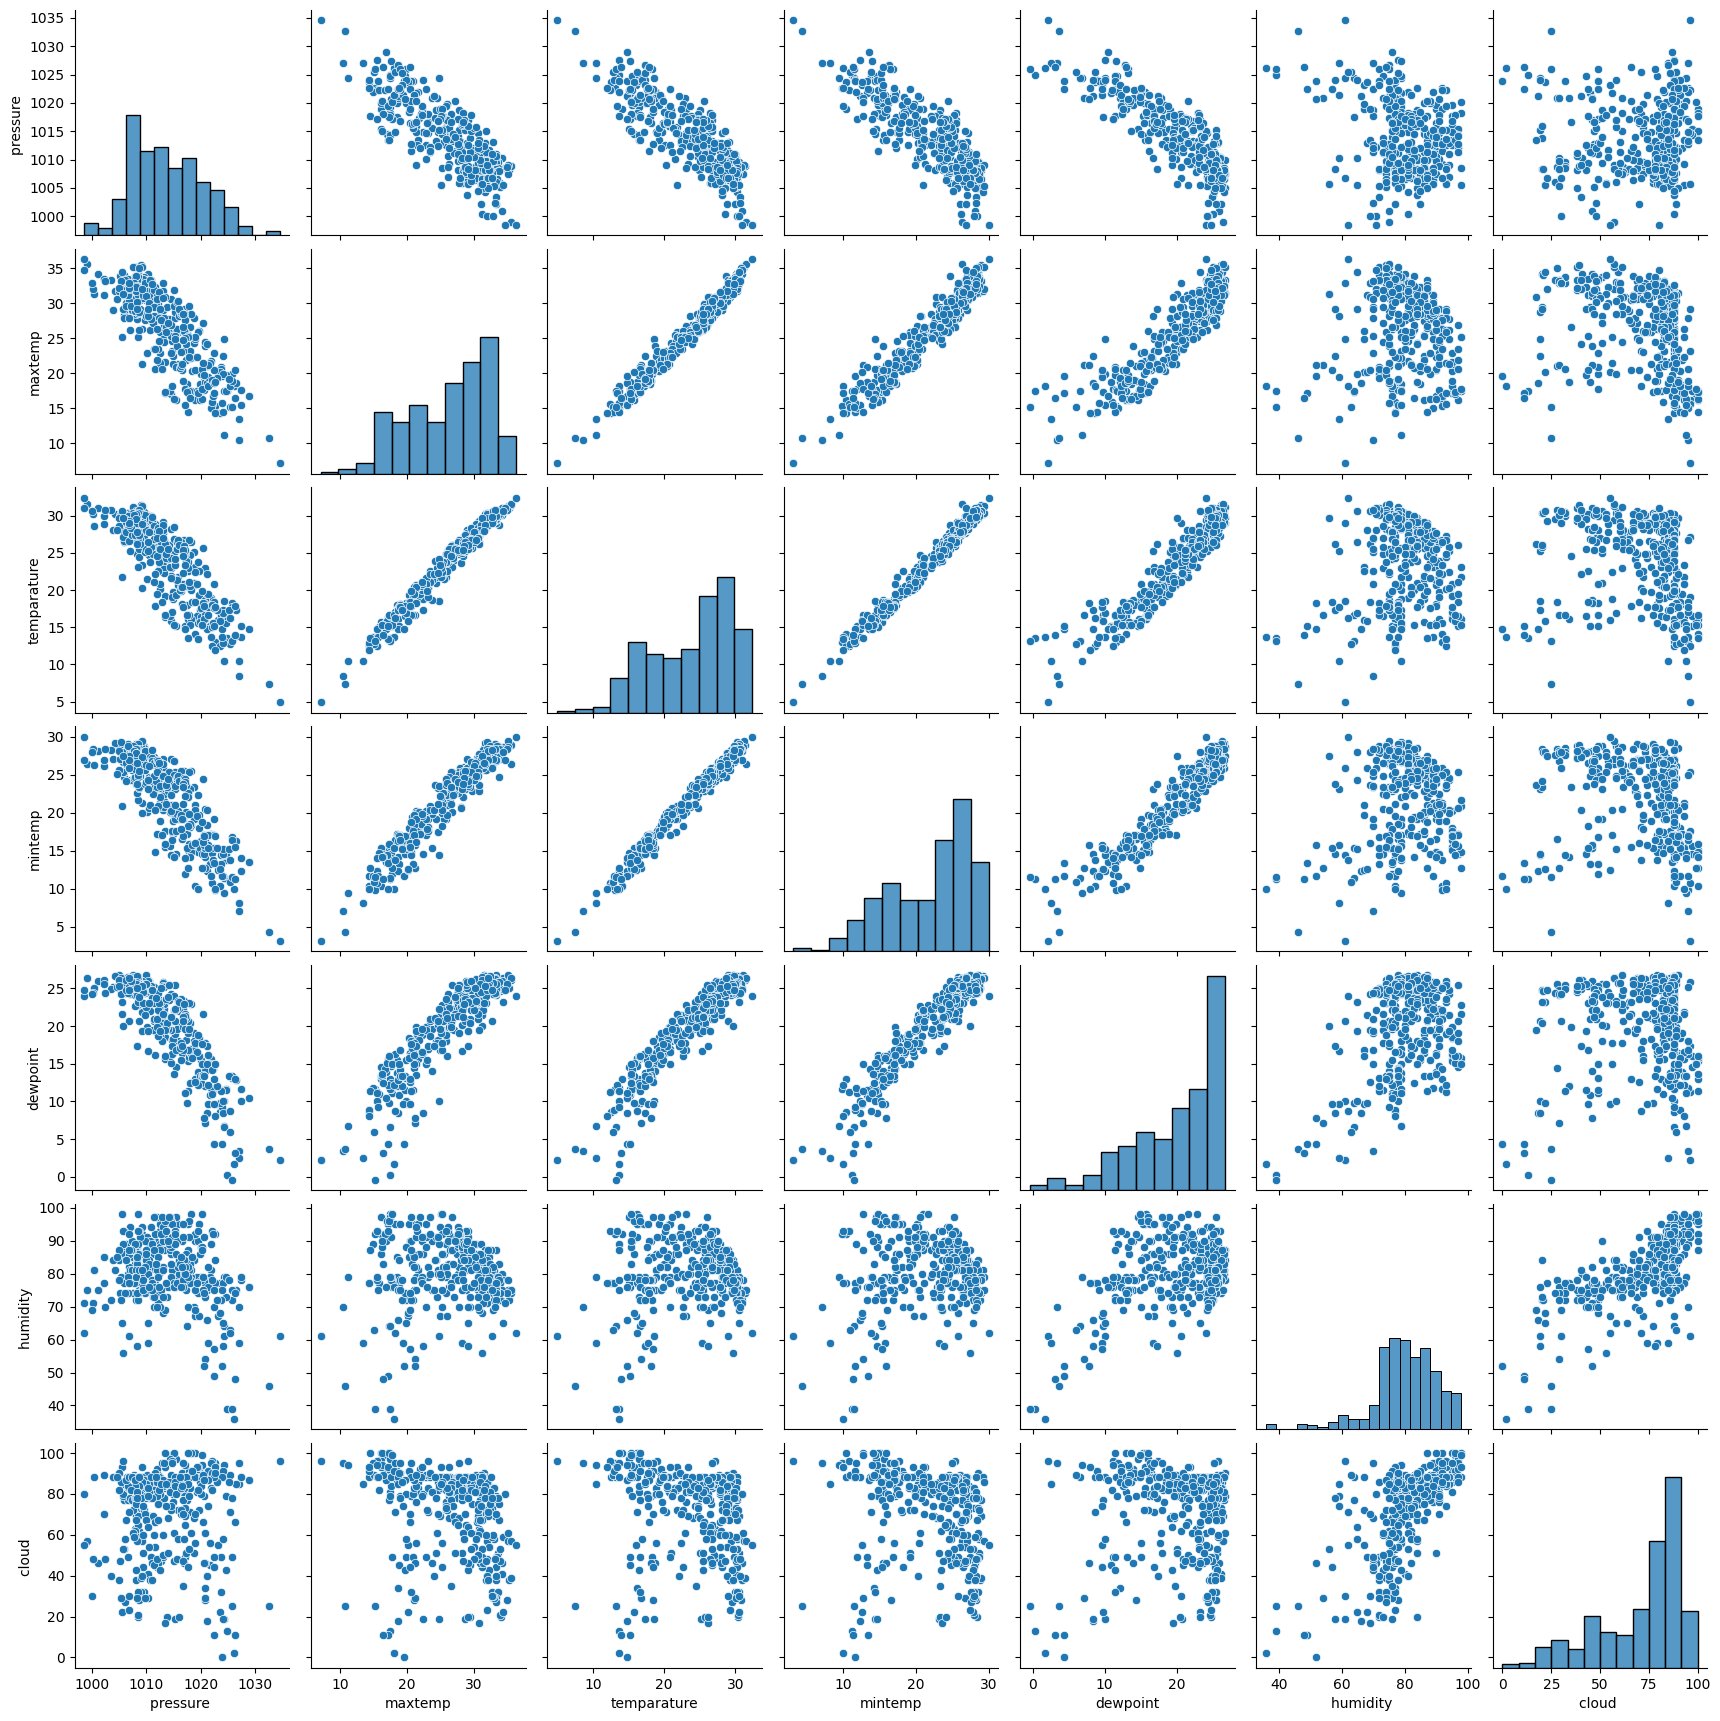

In [23]:
sns.pairplot(Important_weather_features)
plt.show()

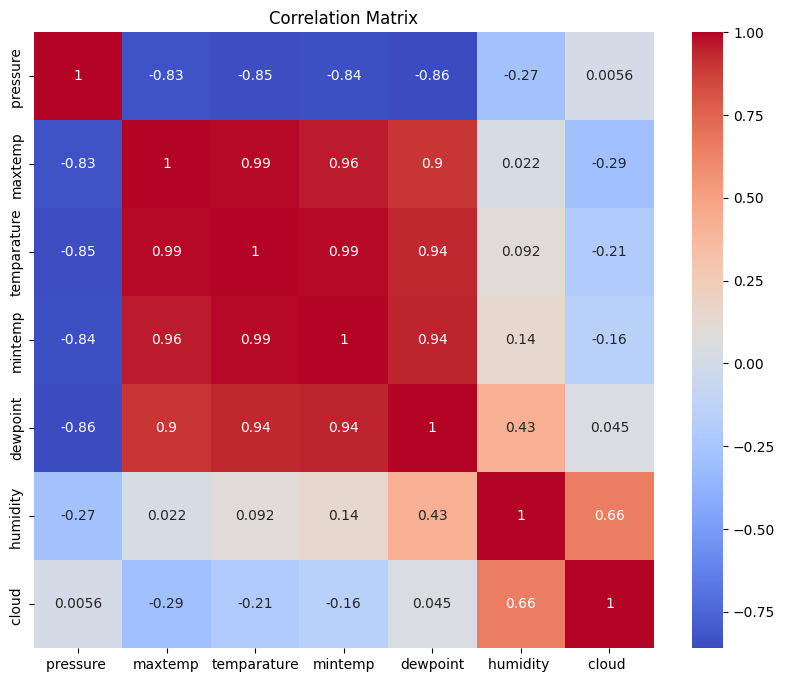

In [24]:
correlation_matrix = Important_weather_features.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_scaler= StandardScaler()
y_scaler= StandardScaler()
X = x_scaler.fit_transform(Important_weather_features[['temparature', 'dewpoint']])
Y = y_scaler.fit_transform(Important_weather_features[['maxtemp', 'mintemp']])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
from sklearn.metrics import mean_squared_error , mean_absolute_error
Y_pred = Lr.predict(X_test)
print(mean_squared_error(Y_test,Y_pred))
print(mean_absolute_error(Y_test,Y_pred))

0.02015783203231266
0.11675770652628127


In [31]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Y_pred)
print("R² Score:", r2)

R² Score: 0.9811759286175787


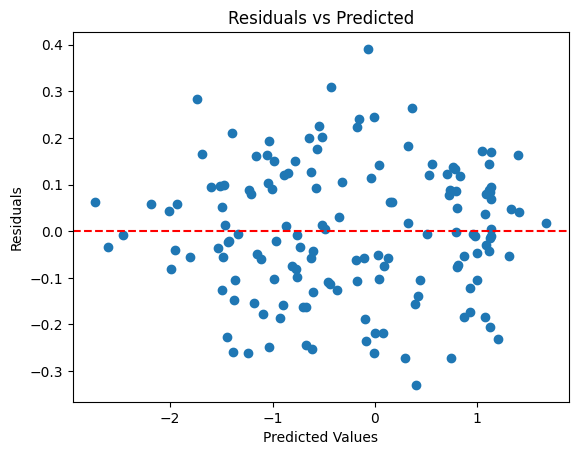

In [32]:
residuals = Y_test - Y_pred
plt.scatter(Y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

In [34]:
temperature = 20.7
dewpoint = 19.9

input_data = [[temperature, dewpoint]]
input_scaled = x_scaler.transform(input_data)

output_scaled = Lr.predict(input_scaled)

output_actual = y_scaler.inverse_transform(output_scaled)

predicted_maxtemp, predicted_mintemp = output_actual[0]
print(f"\nPredicted Max Temperature: {predicted_maxtemp:.2f} °C")
print(f"Predicted Min Temperature: {predicted_mintemp:.2f} °C")



Predicted Max Temperature: 22.46 °C
Predicted Min Temperature: 19.25 °C


c:\Users\shivendra\Desktop\Practice\Machine learning Internshala\mlenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
